In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv('expression_matrix.csv', header = None,  index_col=[0])
len(df.columns)

524

In [3]:
colmeta = pd.read_csv('columns_metadata.csv')
len(colmeta['donor_id'].unique())

42

In [4]:
structure_freq = colmeta["structure_name"].value_counts()

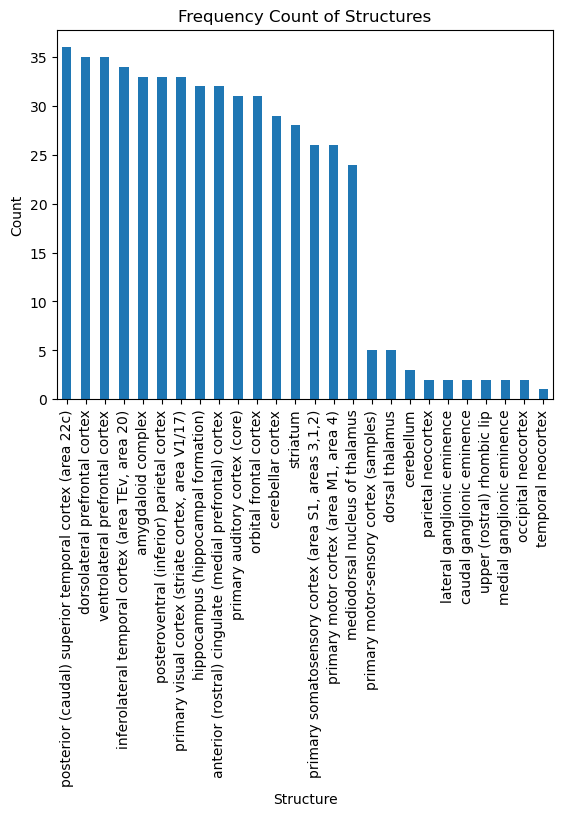

In [5]:
structure_freq.plot(kind='bar', title='Frequency Count of Structures', xlabel='Structure', ylabel='Count')
plt.show()

In [6]:
rowmeta = pd.read_csv('rows_metadata.csv')
len(rowmeta)

52376

In [7]:
omim_brain_genes = pd.read_excel('OMIM-Gene-Map-Retrieval.xlsx')

In [8]:
omim_brain_genes.head()

,Gene Map Search - 'brain genes (Search in: Entries with: Genemap; Retrieve: gene map)',Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Downloaded:,"September 16, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Copyright (c) 1966-2023 Johns Hopkins Universi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cytogenetic location,Genomic coordinates (From NCBI/GRCh38),Gene/Locus,Gene/Locus name,Gene/Locus MIM number,Approved Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotype,Phenotype MIM number,Inheritance,Pheno map key,Mouse Gene (from MGI)
4,1p36,1:1-27600000,AD7CNTP,Alzheimer disease neuronal thread protein,607413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
omim_brain_genes = omim_brain_genes.iloc[3:]
omim_brain_genes.head()

,Gene Map Search - 'brain genes (Search in: Entries with: Genemap; Retrieve: gene map)',Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Cytogenetic location,Genomic coordinates (From NCBI/GRCh38),Gene/Locus,Gene/Locus name,Gene/Locus MIM number,Approved Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotype,Phenotype MIM number,Inheritance,Pheno map key,Mouse Gene (from MGI)
4,1p36,1:1-27600000,AD7CNTP,Alzheimer disease neuronal thread protein,607413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1p36,1:1-27600000,ALPQTL2,"Alkaline phosphatase, plasma level of, QTL 2",612367,NaN,100196914,NaN,linkage with rs1780324,"{Alkaline phosphatase, plasma level of, QTL 2}",612367,NaN,2,NaN
6,1p,1:1-123400001,ANON1,"Anorexia nervosa, susceptibility to, 1",606788,NaN,171514,NaN,NaN,"{Anorexia nervosa, susceptibility to, 1}",606788,NaN,2,NaN
7,1p36,1:1-27600000,BCC1,"Basal cell carcinoma, susceptibility to, 1",605462,NaN,100307118,NaN,associated with rs7538876,"{Basal cell carcinoma, susceptibility to, 1}",605462,NaN,2,NaN


In [10]:
omim_brain_genes = omim_brain_genes.rename(columns=omim_brain_genes.iloc[0])

In [11]:
omim_brain_genes = omim_brain_genes.iloc[1:]
omim_brain_genes

,Cytogenetic location,Genomic coordinates (From NCBI/GRCh38),Gene/Locus,Gene/Locus name,Gene/Locus MIM number,Approved Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotype,Phenotype MIM number,Inheritance,Pheno map key,Mouse Gene (from MGI)
4,1p36,1:1-27600000,AD7CNTP,Alzheimer disease neuronal thread protein,607413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1p36,1:1-27600000,ALPQTL2,"Alkaline phosphatase, plasma level of, QTL 2",612367,NaN,100196914,NaN,linkage with rs1780324,"{Alkaline phosphatase, plasma level of, QTL 2}",612367,NaN,2,NaN
6,1p,1:1-123400001,ANON1,"Anorexia nervosa, susceptibility to, 1",606788,NaN,171514,NaN,NaN,"{Anorexia nervosa, susceptibility to, 1}",606788,NaN,2,NaN
7,1p36,1:1-27600000,BCC1,"Basal cell carcinoma, susceptibility to, 1",605462,NaN,100307118,NaN,associated with rs7538876,"{Basal cell carcinoma, susceptibility to, 1}",605462,NaN,2,NaN
8,1p36,1:1-27600000,BMND3,Bone mineral density QTL 3,606928,NaN,246259,NaN,?another locus at 3p21,[Bone mineral density QTL 3],606928,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,"This search returned 17,887 entries which exce...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,You can register for MIMmatch ( https:///mimma...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
omim_brain_genes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 4 to 267
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Cytogenetic location                    256 non-null    object
 1   Genomic coordinates (From NCBI/GRCh38)  247 non-null    object
 2   Gene/Locus                              229 non-null    object
 3   Gene/Locus name                         229 non-null    object
 4   Gene/Locus MIM number                   229 non-null    object
 5   Approved Symbol                         206 non-null    object
 6   Entrez Gene ID                          223 non-null    object
 7   Ensembl Gene ID                         202 non-null    object
 8   Comments                                35 non-null     object
 9   Phenotype                               99 non-null     object
 10  Phenotype MIM number                    98 non-null     object
 11  Inheri

In [13]:
omim_brain_genes.dropna(subset=['Gene/Locus'], inplace=True)

In [14]:
omim_brain_genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 4 to 232
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Cytogenetic location                    229 non-null    object
 1   Genomic coordinates (From NCBI/GRCh38)  229 non-null    object
 2   Gene/Locus                              229 non-null    object
 3   Gene/Locus name                         229 non-null    object
 4   Gene/Locus MIM number                   229 non-null    object
 5   Approved Symbol                         206 non-null    object
 6   Entrez Gene ID                          223 non-null    object
 7   Ensembl Gene ID                         202 non-null    object
 8   Comments                                35 non-null     object
 9   Phenotype                               99 non-null     object
 10  Phenotype MIM number                    98 non-null     object
 11  Inheri

In [15]:
omim_brain_genes.head()

,Cytogenetic location,Genomic coordinates (From NCBI/GRCh38),Gene/Locus,Gene/Locus name,Gene/Locus MIM number,Approved Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotype,Phenotype MIM number,Inheritance,Pheno map key,Mouse Gene (from MGI)
4,1p36,1:1-27600000,AD7CNTP,Alzheimer disease neuronal thread protein,607413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1p36,1:1-27600000,ALPQTL2,"Alkaline phosphatase, plasma level of, QTL 2",612367,NaN,100196914,NaN,linkage with rs1780324,"{Alkaline phosphatase, plasma level of, QTL 2}",612367,NaN,2,NaN
6,1p,1:1-123400001,ANON1,"Anorexia nervosa, susceptibility to, 1",606788,NaN,171514,NaN,NaN,"{Anorexia nervosa, susceptibility to, 1}",606788,NaN,2,NaN
7,1p36,1:1-27600000,BCC1,"Basal cell carcinoma, susceptibility to, 1",605462,NaN,100307118,NaN,associated with rs7538876,"{Basal cell carcinoma, susceptibility to, 1}",605462,NaN,2,NaN
8,1p36,1:1-27600000,BMND3,Bone mineral density QTL 3,606928,NaN,246259,NaN,?another locus at 3p21,[Bone mineral density QTL 3],606928,NaN,2,NaN


In [70]:
omim_brain_genes['Inheritance'].value_counts()

Series([], Name: Inheritance, dtype: int64)

In [16]:
#create a list of all the MIMs to pass into the API
#mim_list = omim_brain_genes['Gene/Locus MIM number'].tolist()

In [17]:
#Merge brainspan gene list with OMIM-Gene-Map List to find MIMs for the brain genes
brainspan_genes = pd.read_excel('Gene_List_Brainspan.xlsx')
brainspan_genes.head()
bspg = brainspan_genes.copy()

I want to find common genes between the brainspan gene list and the OMIM Gene list. I want to use the column "Approved Symbol" in the OMIM list because many cells in Gene/Locus column have multiple aliases for the same gene. To do this, I need to fill the missing values in the Approved Symbol Column. 

In [18]:
obg = omim_brain_genes.copy()
obg['Approved Symbol'] = obg['Approved Symbol'].fillna(obg['Gene/Locus'])

obg['Approved Symbol'].unique()

obg = obg.rename(columns={'Approved Symbol': 'Gene symbol'})
obg.head(30)

,Cytogenetic location,Genomic coordinates (From NCBI/GRCh38),Gene/Locus,Gene/Locus name,Gene/Locus MIM number,Gene symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotype,Phenotype MIM number,Inheritance,Pheno map key,Mouse Gene (from MGI)
4,1p36,1:1-27600000,AD7CNTP,Alzheimer disease neuronal thread protein,607413,AD7CNTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1p36,1:1-27600000,ALPQTL2,"Alkaline phosphatase, plasma level of, QTL 2",612367,ALPQTL2,100196914,NaN,linkage with rs1780324,"{Alkaline phosphatase, plasma level of, QTL 2}",612367,NaN,2,NaN
6,1p,1:1-123400001,ANON1,"Anorexia nervosa, susceptibility to, 1",606788,ANON1,171514,NaN,NaN,"{Anorexia nervosa, susceptibility to, 1}",606788,NaN,2,NaN
7,1p36,1:1-27600000,BCC1,"Basal cell carcinoma, susceptibility to, 1",605462,BCC1,100307118,NaN,associated with rs7538876,"{Basal cell carcinoma, susceptibility to, 1}",605462,NaN,2,NaN
8,1p36,1:1-27600000,BMND3,Bone mineral density QTL 3,606928,BMND3,246259,NaN,?another locus at 3p21,[Bone mineral density QTL 3],606928,NaN,2,NaN
9,1p36.33,1:1-2300000,"C1DUPp36.33, DUP1p36.33","Chromosome 1p36.33 duplication syndrome, ATAD3...",618815,"C1DUPp36.33, DUP1p36.33",NaN,NaN,NaN,"Chromosome 1p36.33 duplication syndrome, ATAD3...",618815,NaN,4,NaN
10,1p36,1:1-27600000,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,155600,"CMM, MLM, DNS",1243,NaN,some linkage studies negative; see 9p,"{Melanoma, cutaneous malignant, 1}",155600,NaN,2,NaN
11,1pter-p36.13,1:1-20100000,"CTRCT8, CCV","Cataract, congenital, Volkmann type",115665,"CTRCT8, CCV",7792,NaN,linked to Rh in Scottish family,"Cataract 8, multiple types",115665,NaN,2,NaN
12,1p36,1:1-27600000,"DEL1p36, C1DELp36","Chromosome 1p36 deletion syndrome, distal",607872,"DEL1p36, C1DELp36",NaN,NaN,contiguous gene deletion syndrome,"Chromosome 1p36 deletion syndrome, distal",607872,NaN,4,NaN
13,1p36,1:1-27600000,"DEL1p36, C1DELp36","Chromosome 1p36 deletion syndrome, proximal",619343,"DEL1p36, C1DELp36",NaN,NaN,NaN,"Chromosome 1p36 deletion syndrome, proximal",619343,NaN,4,NaN


Now I can try to merge the two dataframes to see how many genes they have in common and to get MIMs for the brain genes. Need to change the column names I am merging on to be the same. 

Unable to do this merge for some reason "keyerror". Lets look at the list of genes in the brainspan list and see if we can see any of the same genes by hand. 

In [19]:
bspg.columns


Index(['Gene symbol ', 'EntrezID ', 'Gene description ',
       'Target tissue specimen ', 'Specimen type ', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7'],
      dtype='object')

There is a space after the column name. Fix that and try again. 

In [20]:
bspg = bspg.rename(columns={'Gene symbol ': 'Gene symbol'})
bspg.columns

Index(['Gene symbol', 'EntrezID ', 'Gene description ',
       'Target tissue specimen ', 'Specimen type ', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7'],
      dtype='object')

In [21]:
#bso_merge = obg.merge(brainspan_genes,on='Gene symbol')
bso_merge = pd.merge(pd.DataFrame(obg), pd.DataFrame(bspg), left_on=['Gene symbol'], 
             right_on= ['Gene symbol'], how='left')
#bso_merge = pd.merge(obg, bspg, on='Gene symbol')
bso_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cytogenetic location                    229 non-null    object 
 1   Genomic coordinates (From NCBI/GRCh38)  229 non-null    object 
 2   Gene/Locus                              229 non-null    object 
 3   Gene/Locus name                         229 non-null    object 
 4   Gene/Locus MIM number                   229 non-null    object 
 5   Gene symbol                             229 non-null    object 
 6   Entrez Gene ID                          223 non-null    object 
 7   Ensembl Gene ID                         202 non-null    object 
 8   Comments                                35 non-null     object 
 9   Phenotype                               99 non-null     object 
 10  Phenotype MIM number                    98 non-null     object

In [22]:
bso_merge.head()

,Cytogenetic location,Genomic coordinates (From NCBI/GRCh38),Gene/Locus,Gene/Locus name,Gene/Locus MIM number,Gene symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotype,...,Inheritance,Pheno map key,Mouse Gene (from MGI),EntrezID,Gene description,Target tissue specimen,Specimen type,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1p36,1:1-27600000,AD7CNTP,Alzheimer disease neuronal thread protein,607413,AD7CNTP,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1p36,1:1-27600000,ALPQTL2,"Alkaline phosphatase, plasma level of, QTL 2",612367,ALPQTL2,100196914,NaN,linkage with rs1780324,"{Alkaline phosphatase, plasma level of, QTL 2}",...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1p,1:1-123400001,ANON1,"Anorexia nervosa, susceptibility to, 1",606788,ANON1,171514,NaN,NaN,"{Anorexia nervosa, susceptibility to, 1}",...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1p36,1:1-27600000,BCC1,"Basal cell carcinoma, susceptibility to, 1",605462,BCC1,100307118,NaN,associated with rs7538876,"{Basal cell carcinoma, susceptibility to, 1}",...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1p36,1:1-27600000,BMND3,Bone mineral density QTL 3,606928,BMND3,246259,NaN,?another locus at 3p21,[Bone mineral density QTL 3],...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
len(bspg)

450

In [24]:
len(obg)

229

I think this means that there was no overlap between the genes in the datasets. Have to check this next. For now, I will just collect the MIM numbers from the omim gene list and use the API to gather the phenotype maps. 

In [25]:
mim_list = obg['Gene/Locus MIM number'].tolist()
mim_list[:4]

['607413', '612367', '606788', '605462']

In [26]:
mim_list_final = [eval(i) for i in mim_list]
print(mim_list_final)

[607413, 612367, 606788, 605462, 606928, 618815, 155600, 115665, 607872, 619343, 131190, 605225, 612596, 605606, 604008, 154280, 618485, 616765, 610770, 619262, 615921, 608060, 147571, 103320, 612091, 612090, 612094, 603905, 600315, 614282, 615291, 615291, 615291, 616593, 619756, 601328, 611354, 615467, 605865, 601365, 617293, 609183, 613482, 611833, 611901, 617227, 612317, 612316, 612316, 616101, 617680, 611141, 603321, 176873, 619315, 603320, 116951, 611616, 139380, 139380, 139380, 610171, 620187, 137163, 137163, 137163, 176982, 615183, 164780, 607671, 606242, 620048, 602859, 602859, 612836, 606162, 607348, 602746, 618104, 608535, 605557, 605557, 618871, 604266, 615148, 611460, 606040, 601990, 615242, 619154, 616690, 616690, 601883, 610972, 614414, 607215, 607215, 601142, 610771, 180474, 616923, 605851, 609971, 614269, 602587, 609970, 606351, 606351, 606351, 603366, 611101, 611101, 620304, 606225, 165270, 616262, 620054, 612532, 614827, 611501, 608543, 603657, 603427, 604097, 602250,

In [27]:
len(mim_list_final)/20

11.45

In [28]:
set1 = mim_list_final[0:20]
set2 = mim_list_final[21:41]
set3 = mim_list_final[42:62]
set4 = mim_list_final[63:83]
set5 = mim_list_final[84:104]
set6 = mim_list_final[105:125]
set7 = mim_list_final[126:146]
set8 = mim_list_final[147:167]
set9 = mim_list_final[168:188]
set10 = mim_list_final[189:209]
set11 = mim_list_final[210:230]
set12 = mim_list_final[231:]

In [29]:
print(set1)

[607413, 612367, 606788, 605462, 606928, 618815, 155600, 115665, 607872, 619343, 131190, 605225, 612596, 605606, 604008, 154280, 618485, 616765, 610770, 619262]


In [30]:
url1 = 'https://api.omim.org/api/entry/?format=json&mimNumber=607413,612367,606788,605462,606928,618815,155600,115665,607872,619343,131190,605225,612596,605606,604008,154280,618485,616765,610770,619262&include=text:clinicalFeatures&apiKey=QvNi9v1GQuyDW2dqJvtM5A' 
r1 = requests.get(url1)
r1.status_code
OMIM_json1 = r1.json()
OMIM_info1 = json.dumps(OMIM_json1)
with open("OMIM_info1.json", "w") as outfile:
    outfile.write(OMIM_info1)

In [31]:
print(set2)

[608060, 147571, 103320, 612091, 612090, 612094, 603905, 600315, 614282, 615291, 615291, 615291, 616593, 619756, 601328, 611354, 615467, 605865, 601365, 617293]


In [32]:
url2 = 'https://api.omim.org/api/entry/?format=json&mimNumber=608060,147571,103320,612091,612090,612094,603905,600315,614282,615291,615291,615291,616593,619756,601328,611354,615467,605865,601365,617293&include=text:clinicalFeatures&apiKey=QvNi9v1GQuyDW2dqJvtM5A' 
r2 = requests.get(url2)
OMIM_json2 = r2.json()
OMIM_info2 = json.dumps(OMIM_json2)
with open("OMIM_info2.json", "w") as outfile:
    outfile.write(OMIM_info2)

In [33]:
print(set3)

[613482, 611833, 611901, 617227, 612317, 612316, 612316, 616101, 617680, 611141, 603321, 176873, 619315, 603320, 116951, 611616, 139380, 139380, 139380, 610171]


In [34]:
url3 = 'https://api.omim.org/api/entry/?format=json&mimNumber=608060,147571,103320,612091,612090,612094,603905,600315,614282,615291,615291,615291,616593,619756,601328,611354,615467,605865,601365,617293&include=text:clinicalFeatures&apiKey=QvNi9v1GQuyDW2dqJvtM5A' 
r3 = requests.get(url3)
OMIM_json3 = r3.json()
OMIM_info3 = json.dumps(OMIM_json3)
with open("OMIM_info3.json", "w") as outfile:
    outfile.write(OMIM_info3)

In [35]:
print(set4)

[137163, 137163, 137163, 176982, 615183, 164780, 607671, 606242, 620048, 602859, 602859, 612836, 606162, 607348, 602746, 618104, 608535, 605557, 605557, 618871]


In [36]:
url4 = 'https://api.omim.org/api/entry/?format=json&mimNumber=137163,137163,137163,176982,615183,164780,607671,606242,620048,602859,602859,612836,606162,607348,602746,618104,608535,605557,605557,618871&include=text:clinicalFeatures&apiKey=QvNi9v1GQuyDW2dqJvtM5A' 
r4 = requests.get(url4)
OMIM_json4 = r4.json()
OMIM_info4 = json.dumps(OMIM_json4)
with open("OMIM_info4.json", "w") as outfile:
    outfile.write(OMIM_info4)

In [147]:
with open('OMIM_info4.json') as f:
    data = json.load(f)

In [150]:
data

{'omim': {'version': '1.0',
  'entryList': [{'entry': {'prefix': '*',
     'mimNumber': 602859,
     'status': 'live',
     'titles': {'preferredTitle': 'PEROXISOME BIOGENESIS FACTOR 10; PEX10',
      'alternativeTitles': 'PEROXIN 10'}}},
   {'entry': {'prefix': '*',
     'mimNumber': 615183,
     'status': 'live',
     'titles': {'preferredTitle': 'CHROMOSOME 1 OPEN READING FRAME 86; C1ORF86',
      'alternativeTitles': 'FANCONI ANEMIA-ASSOCIATED PROTEIN, 20-KD; FAAP20'}}},
   {'entry': {'prefix': '*',
     'mimNumber': 137163,
     'status': 'live',
     'titles': {'preferredTitle': 'GAMMA-AMINOBUTYRIC ACID RECEPTOR, DELTA; GABRD',
      'alternativeTitles': 'GABA-A RECEPTOR, DELTA POLYPEPTIDE'}}},
   {'entry': {'prefix': '%',
     'mimNumber': 606242,
     'status': 'live',
     'titles': {'preferredTitle': 'MENTAL RETARDATION, MICROCEPHALY, GROWTH RETARDATION, JOINT CONTRACTURES, AND FACIAL DYSMORPHISM',
      'alternativeTitles': 'KONDOH SYNDROME'},
     'textSectionList': [{'text

In [251]:
temp_dict_text = {}
td_titles_pref = {}
td_titles_alt = {}
entry_list = {}

for idx, obj in enumerate(data['omim']['entryList']):
    #print(idx,obj)
    entry_list = obj
    entry = entry_list['entry']
    mim = entry['mimNumber']
    print(mim)
    titles = entry['titles']
    #print(titles)
    #text_section = entry['textSectionList']
    #print(text_section)

    for x,y in enumerate(entry):
        #print(x,y)
        if y == 'textSectionList':
            for r,s in enumerate(obj['entry']['textSectionList']):
                temp_dict_text = s
                td2 = temp_dict_text['textSection']
                #print(td2)
                phenotype =td2['textSectionContent'] 
                print(phenotype)
    #for a,b in enumerate(obj['entry']['titles']):
        #td_titles_pref = b
    #    print(b)
        #t2 = td_titles_pref['preferredTitle']
        #print(b,t2)
    #for c,d in enumerate(obj['entry']['textSectionList']):
    #    print(c,d)
    #if obj['0'] == 0:
    #    data.pop(idx)

#new_file_name = 'new-file.json'

#with open(new_file_name, 'w', encoding='utf-8') as f:
#    f.write(json.dumps(data, indent=2))

602859
615183
137163
606242
{1:Bouwes Bavinck et al. (1987)} reported a mother and son with an apparently previously undescribed syndrome involving mild mental retardation, microcephaly, short stature, eye defects, hypoplastic and posteriorly rotated low-set ears with overfolded helices, and mild facial dysmorphism, including widow's peak, narrow bifrontal diameter, midface hypoplasia, depressed nasal bridge, thickened alae nasi, and long flat philtrum. Both mother and son had congenital cataracts and epicanthal folds, but the mother also had microphthalmia with microcornea and coloboma of the iris and choroid, whereas the boy had congenital ptosis and detached retina. In addition, the boy had inverted nipples, umbilical hernia, hydroureters with hydronephrosis, and cryptorchidism. Both patients had small hands, and the boy also had hyperextensibility of the finger and toe joints.

{4:Kondoh et al. (2001)} reported 2 sisters with an autosomal recessive multiple congenital anomalies/men

In [ ]:
for key,item in data['omim'].items():
  if item['entryList'] == 'name1' or item['prop2'] == 'name1':
    print 'found one'

In [79]:
data2 = pd.concat({k: pd.DataFrame(v).T for k, v in data.items()}, axis=0)

In [91]:
data3 = pd.concat({k: pd.DataFrame(v).T for k, v in data2.items()}, axis=0)
data3.drop(columns = ('omim','version'))
data3.columns

MultiIndex([('omim',   'version'),
            ('omim', 'entryList')],
           )

In [128]:
data4 = pd.concat({k: pd.DataFrame(v) for k, v in data3.items()}, axis=0)
#data4 = data4.drop([0,15])
data4 = data4.reset_index()
data4 = data4[16:]


In [129]:
data4.columns

MultiIndex([('level_0',          ''),
            ('level_1',          ''),
            ('level_2',          ''),
            ('level_3',          ''),
            (   'omim',   'version'),
            (   'omim', 'entryList')],
           )

In [130]:
data4 = data4.drop(columns=([('level_0',          ''),
            ('level_1',          ''),
            ('level_2',          ''),
            ('level_3',          ''),
            (   'omim',   'version')]))

In [132]:
data4.columns = data4.columns.droplevel(0)
data4

,entryList
16,"{'entry': {'prefix': '*', 'mimNumber': 602859,..."
17,"{'entry': {'prefix': '*', 'mimNumber': 615183,..."
18,"{'entry': {'prefix': '*', 'mimNumber': 137163,..."
19,"{'entry': {'prefix': '%', 'mimNumber': 606242,..."
20,"{'entry': {'prefix': '*', 'mimNumber': 612836,..."
21,"{'entry': {'prefix': '*', 'mimNumber': 164780,..."
22,"{'entry': {'prefix': '*', 'mimNumber': 618104,..."
23,"{'entry': {'prefix': '*', 'mimNumber': 602746,..."
24,"{'entry': {'prefix': '*', 'mimNumber': 176982,..."
25,"{'entry': {'prefix': '*', 'mimNumber': 620048,..."


In [146]:
tmpDF = pd.DataFrame()
tmpDF = data4['entryList'].str.split(',', expand=True)
tmpDF

,0
16,NaN
17,NaN
18,NaN
19,NaN
20,NaN
21,NaN
22,NaN
23,NaN
24,NaN
25,NaN


In [ ]:
import pandas as pd

data = {'name': ['John', 'Jane', 'Mike'],
        'age': [25, 30, 35],
        'address': [{'city': 'New York', 'state': 'NY'},
                    {'city': 'San Francisco', 'state': 'CA'},
                    {'city': 'Seattle', 'state': 'WA'}]
       }

df = pd.DataFrame(data)

# Define a function to extract city and state from the dictionary
def extract_city_state(address_dict):
    return [address_dict['city'], address_dict['state']]

# Apply the function to each row in the address column
df[['city', 'state']] = df['address'].apply(lambda x: pd.Series(extract_city_state(x)))

# Drop the original address column
df = df.drop('address', axis=1)

print(df)

Tomorrow: access peta library and look at the GTEx data. Finish website. Go through the assignment criteria in detail to make sure I haven't missed anything. 

I also have a bunch of data from GTEx that is stored on a server that I have access to through my job. The files are too large to put on my computer and I am still figuring out how to ssh into that server through the CU Boulder jupyter notebooks. 

In [57]:
url1x = 'https://api.omim.org/api/entry/?format=xml&mimNumber=137163,137163,137163,176982,615183,164780,607671&include=text:clinicalFeatures&apiKey=QvNi9v1GQuyDW2dqJvtM5A' 
r5 = requests.get(url1x)

In [58]:
r5.status_code

200

In [60]:
with open('r5.xml', 'w') as f:
    f.write(r5.text)


In [40]:
filename="OMIM_cleaned4.csv"

MyFILE=open(filename,"w")
WriteThis="Entry,Prefix,mimNumber,Status,Titles,preferredTitle,alternativeTitles,textSectionList,textSection,textSectionName,textSectionTitle,textSectionContent\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [55]:

MyFILE=open(filename, "a")

## Go through the json text:
for items in OMIM_json4["omim"]:
    print(items, "\n\n\n")
    #entries=items['version']['entryList']
    #print(entries)

version 



entryList 





In [56]:
import xml.etree.ElementTree as Xet

In [67]:
cols = ['Entry','Prefix','mimNumber','Status','Titles','preferredTitle','alternativeTitles','textSectionList','textSection','textSectionName','textSectionTitle','textSectionContent']
rows = []

tree = Xet.parse('r5.xml')
root = tree.getroot()

for i in root:
    print(i)
    #version = i.find("version").text
    #entryList = i.find("entryList").text
    #for i in entryList:
    #    email = i.find("email").text
    #    date = i.find("date").text
    #    country = i.find("country").text
  
    #    rows.append({"name": name,
    #                 "phone": phone,
    #                 "email": email,
    #                 "date": date,
    #                 "country": country})
    #rows.append({"version": version,
    #                 "entryList": entryList,})
#d = pd.DataFrame(rows, columns=cols)
  
# Writing dataframe to csv
#d.to_csv('output.csv')

def print_subtree(subtree):
    for y in subtree:
        print( "\t", y.tag, ":", y.text)

for x in root:
    print(x.tag, x.attrib)
    print_subtree(x.getchildren())

<Element 'entryList' at 0x7f4fbae45ad0>
entryList {}


AttributeError: 'xml.etree.ElementTree.Element' object has no attribute 'getchildren'